### 1. Read in Data

In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

data = pd.read_csv('data/mushrooms.csv')
display(data.head())

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [3]:
data.iloc[:, 0].replace({'e': 'edible', 'p': 'poisonous'}, inplace=True)

In [4]:
# Split data into X & y
X = data.drop('class', axis=1)
y = data['class']

# View X
display(X.head())
print('Shape:',X.shape)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


Shape: (8124, 22)


### 2. Analyse Data

In [5]:
display(data.head())
print(data.shape)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,edible,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,edible,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,poisonous,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,edible,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


(8124, 23)


                                             |      | [  0%]   00:00 -> (? left)


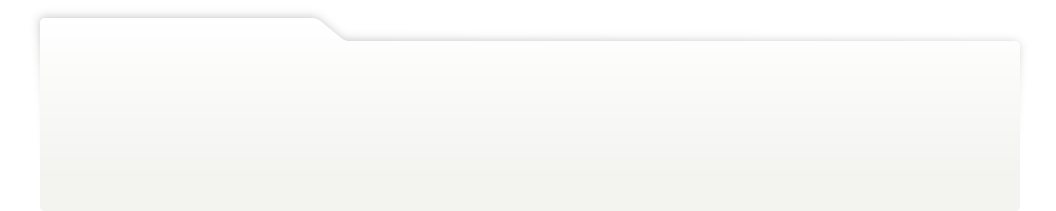
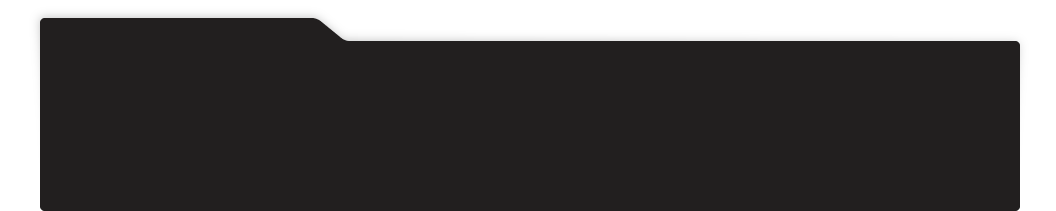
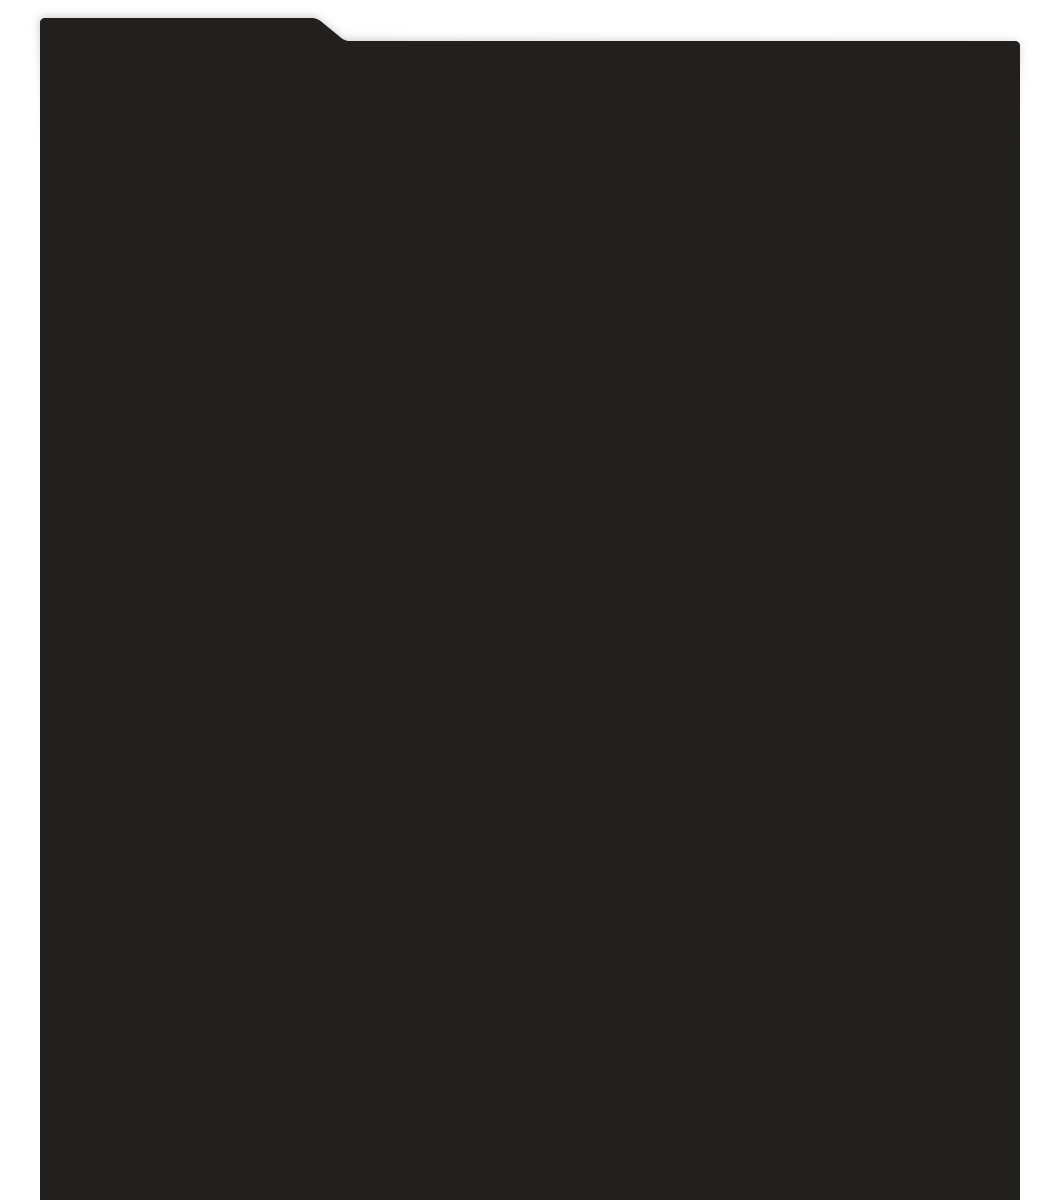
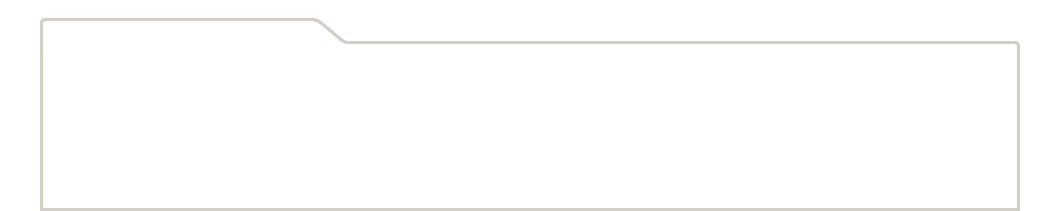
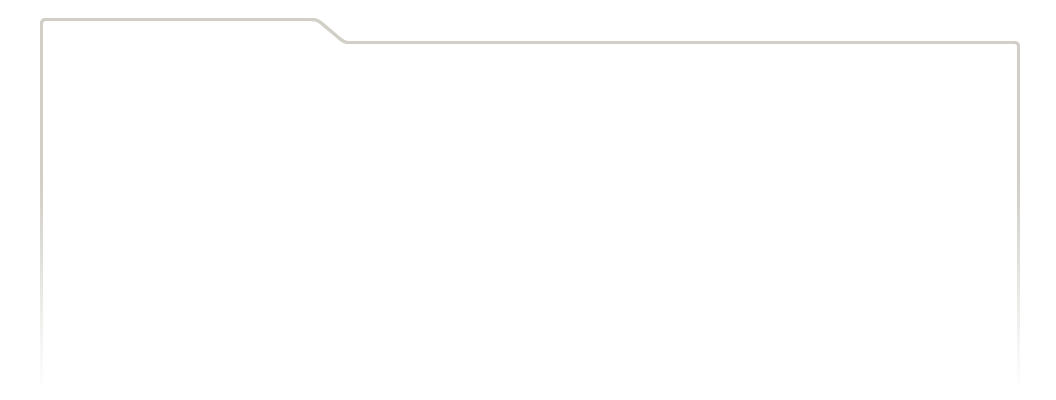
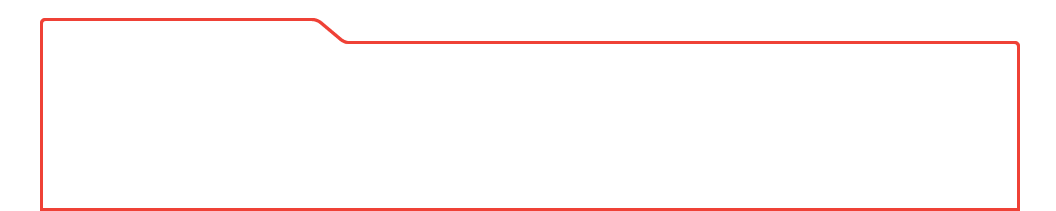
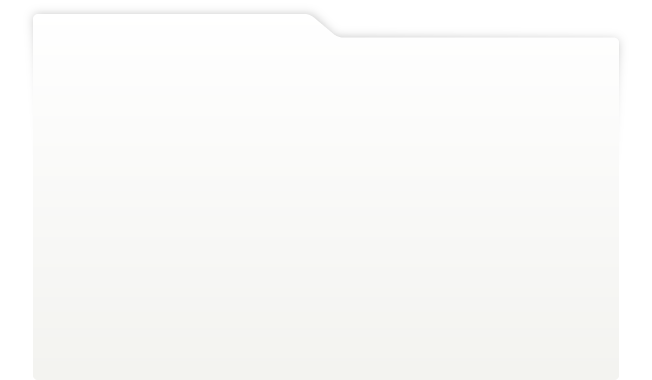
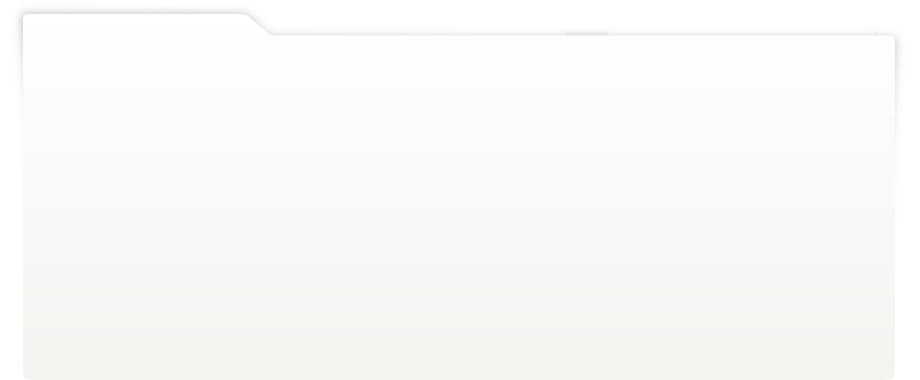
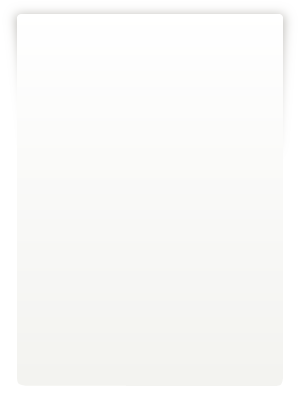
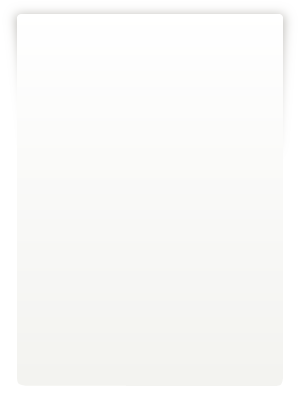
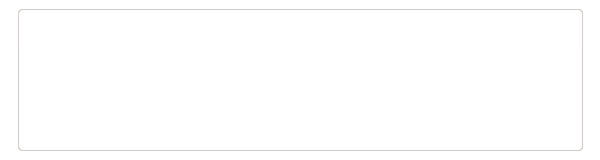
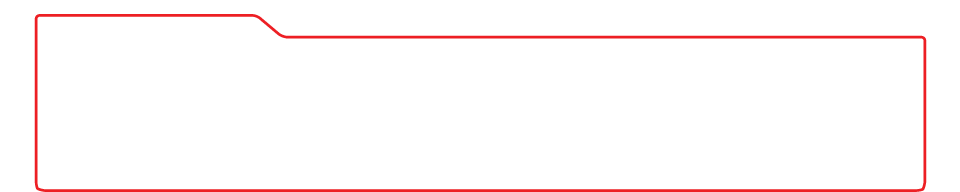
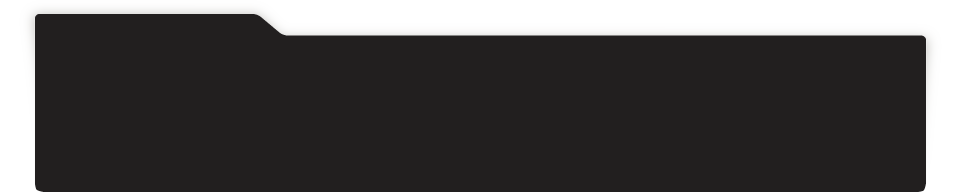
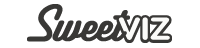
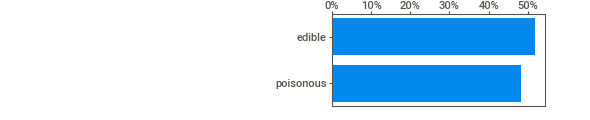
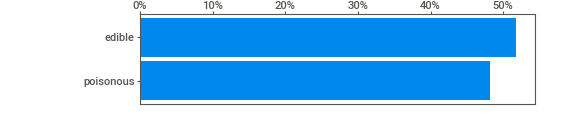
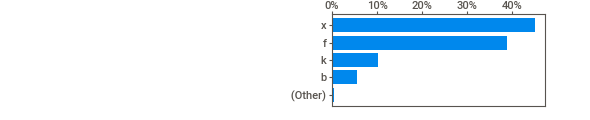
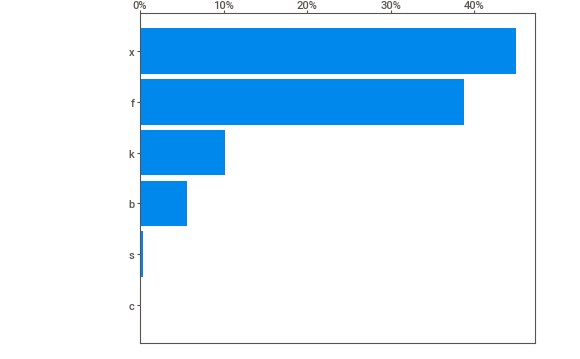
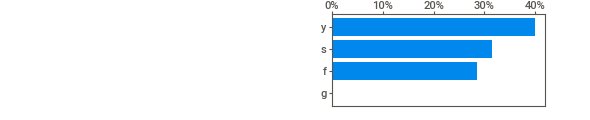
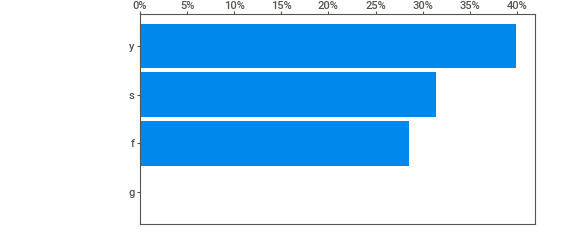
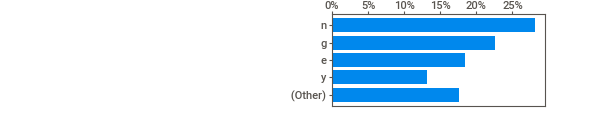
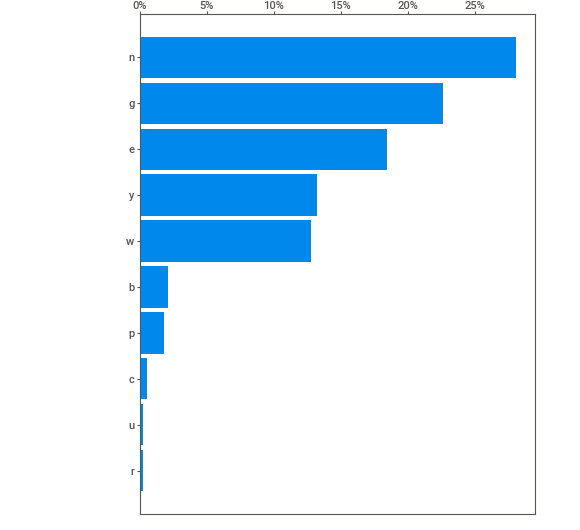
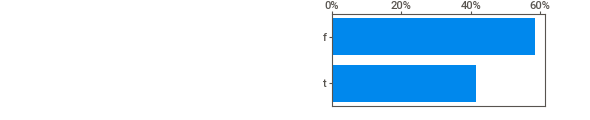
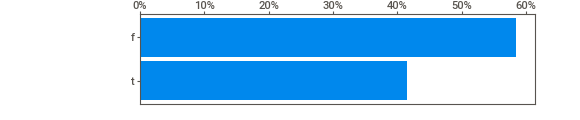
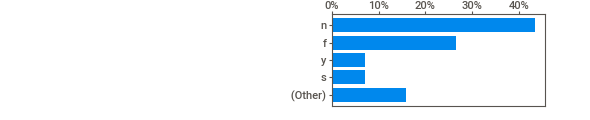
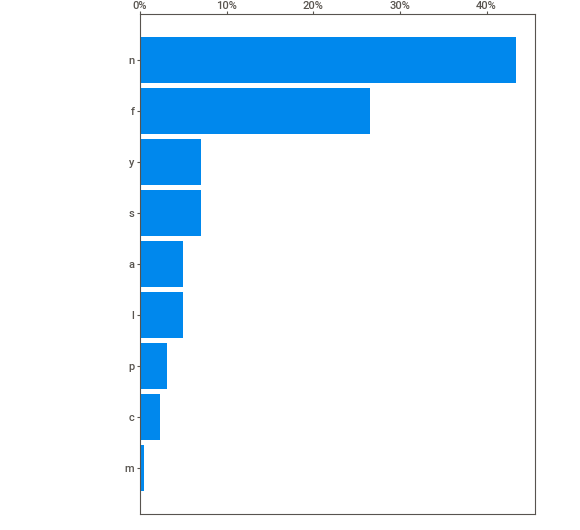
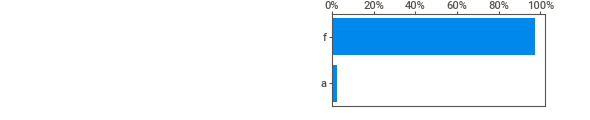
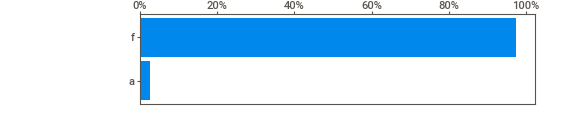
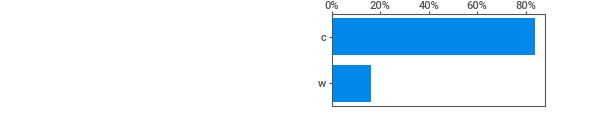
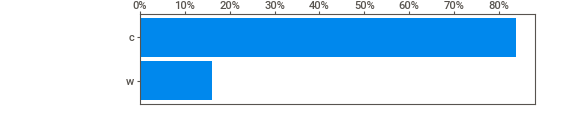
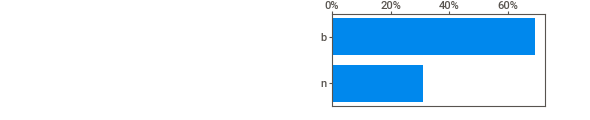
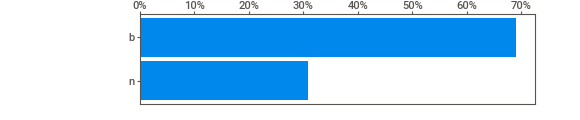
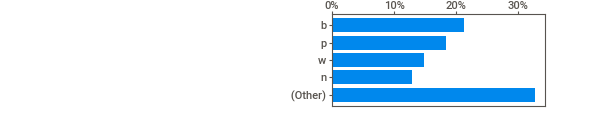
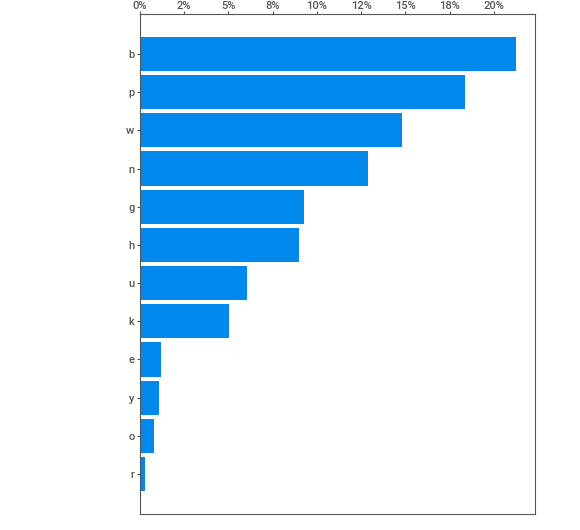
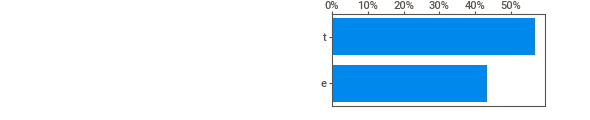
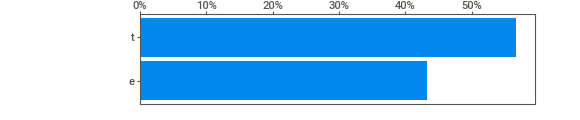
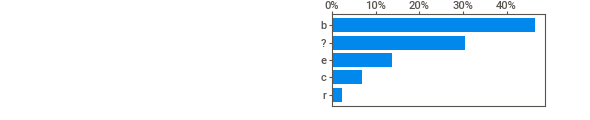
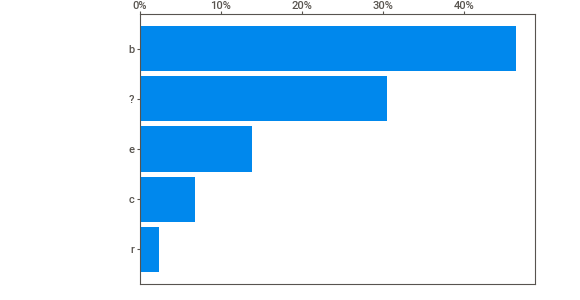
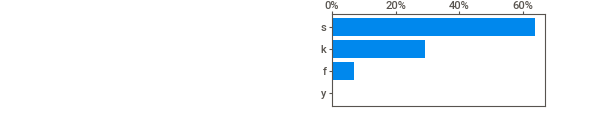
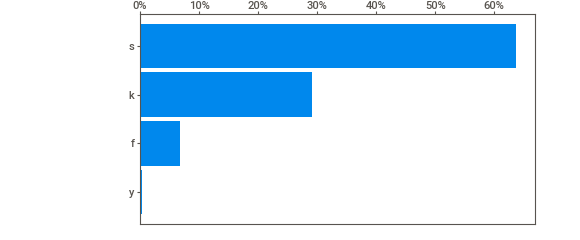
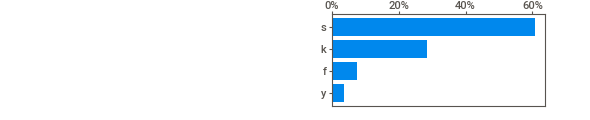
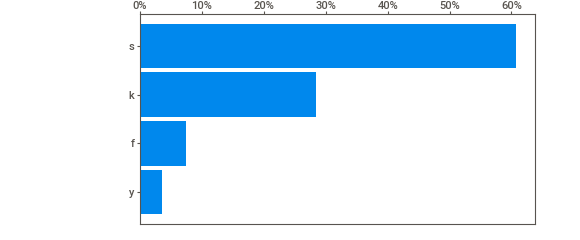
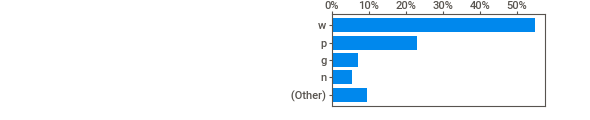
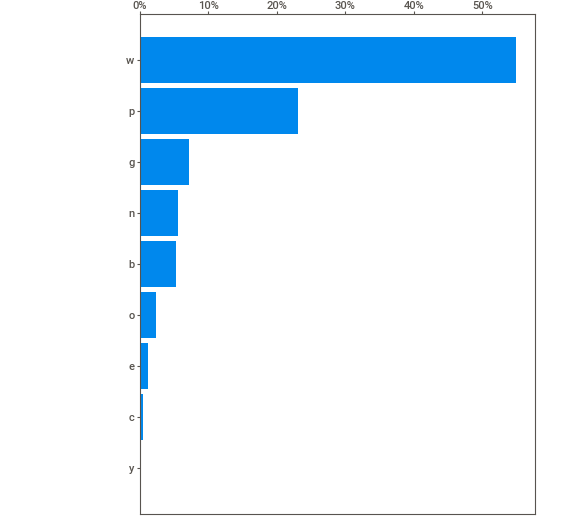
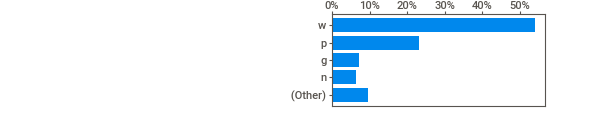
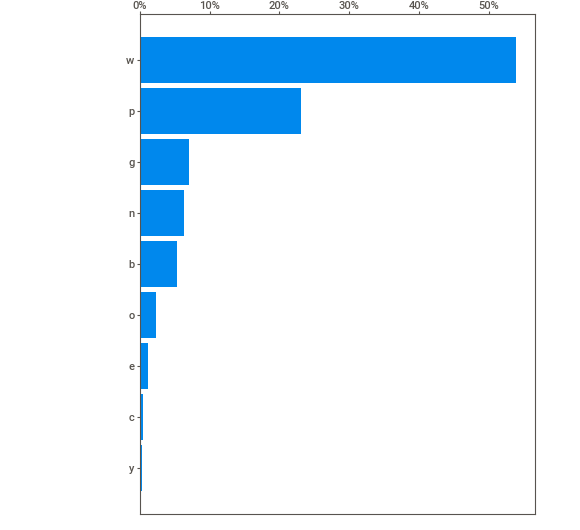
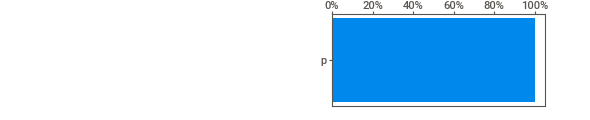
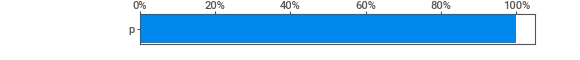
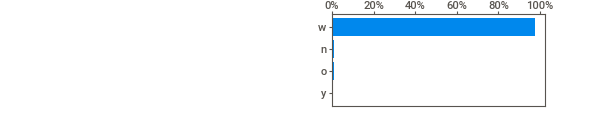
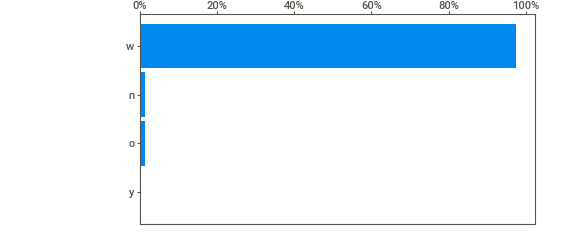
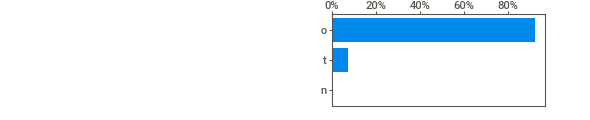
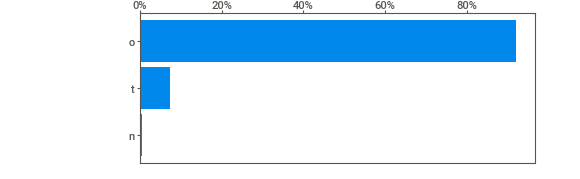
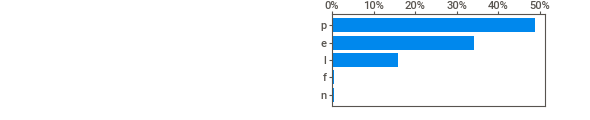
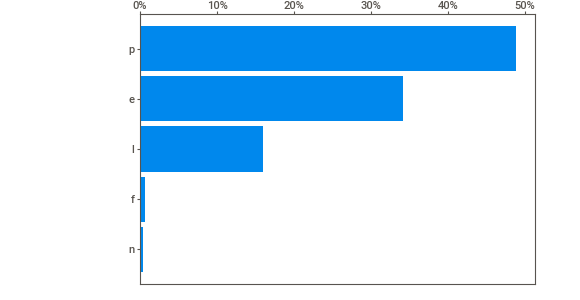
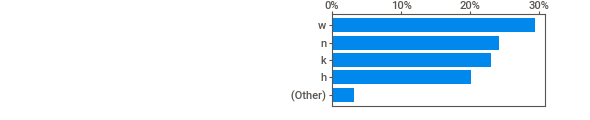
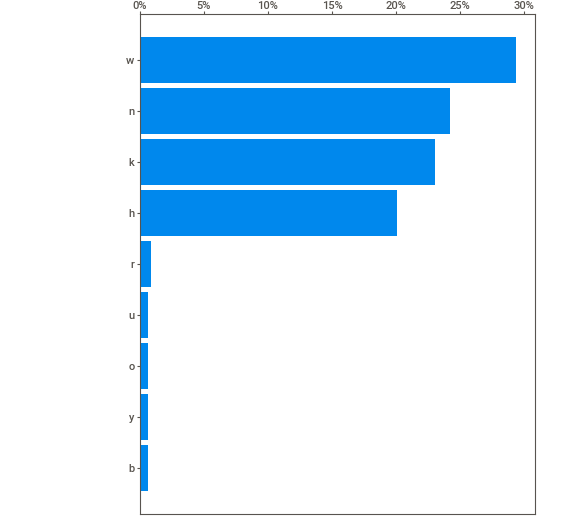
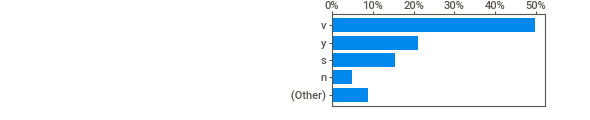
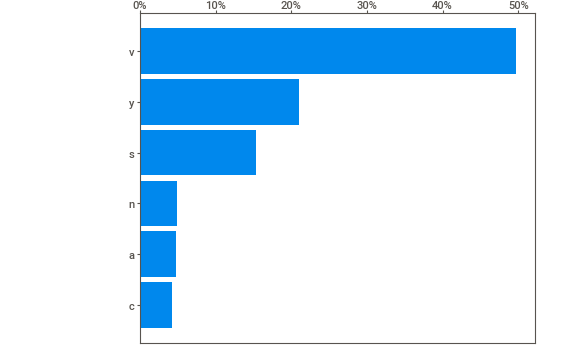
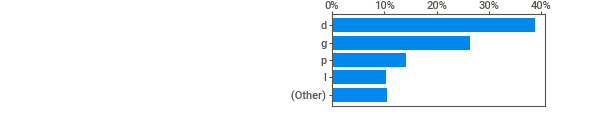
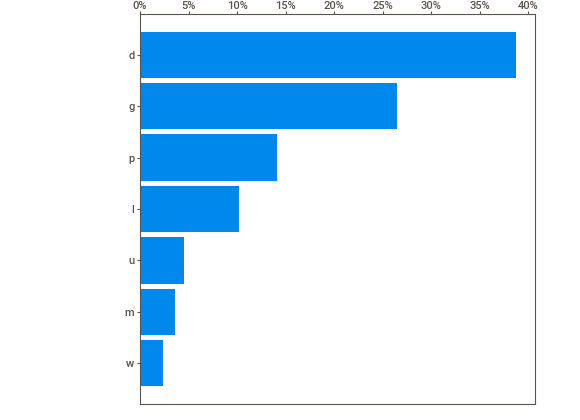
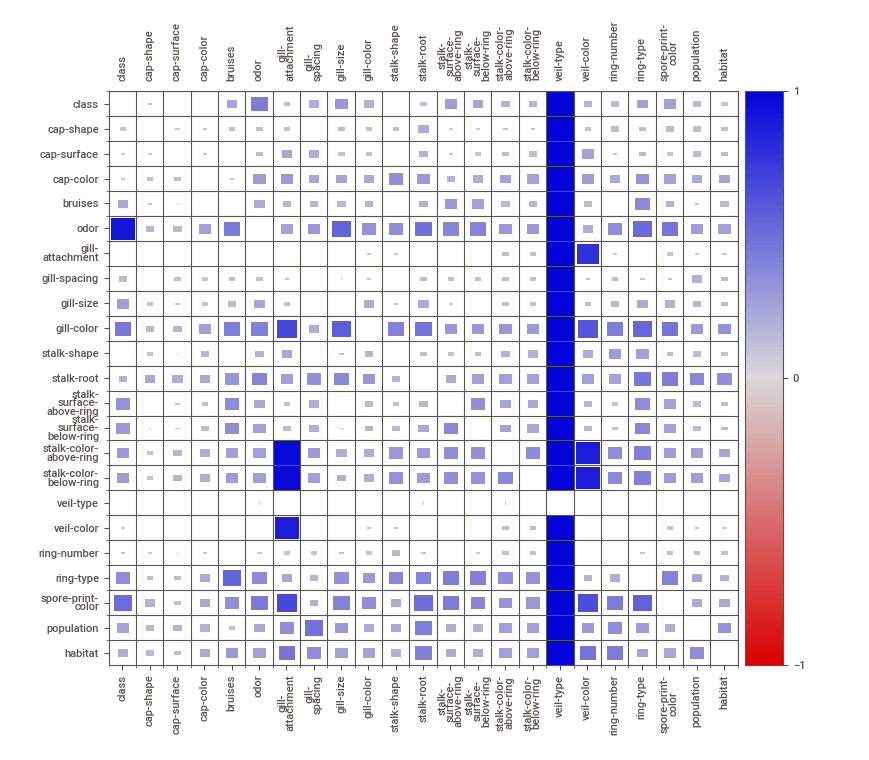
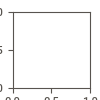

Report AnalyzeReport was generated.


In [6]:
import sweetviz as sv

# For quick EDA
analyze_report = sv.analyze(data)
analyze_report.show_notebook(layout='vertical')

# Download to current directory
analyze_report.show_html('AnalyzeReport', open_browser=False)

### 3. Comparison of train vs. test set

#### 3-1. Data split using 70/30 split ratio

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
# Dataset shape
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5686, 22) (2438, 22) (5686,) (2438,)


In [9]:
display(X_train.head(), y_train.head())

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1530,f,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
1725,f,y,w,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,v,g
5528,f,y,r,f,n,f,c,n,h,e,?,s,f,w,w,p,w,o,f,h,v,d
3789,f,y,g,t,n,f,c,b,p,t,b,s,s,g,g,p,w,o,p,n,y,d
5027,x,f,y,f,f,f,c,b,h,e,b,k,k,n,b,p,w,o,l,h,v,p


1530    poisonous
1725    poisonous
5528       edible
3789       edible
5027    poisonous
Name: class, dtype: object

#### 3-2. Comparison report

                                             |      | [  0%]   00:00 -> (? left)


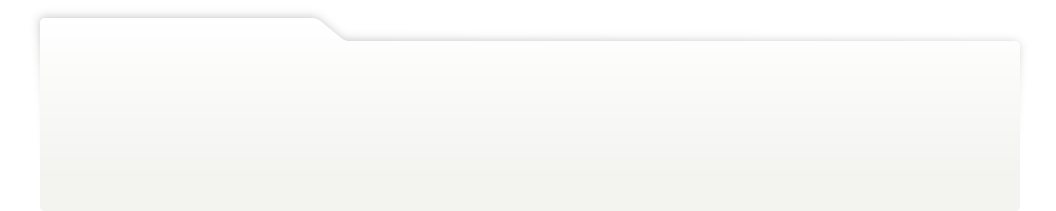
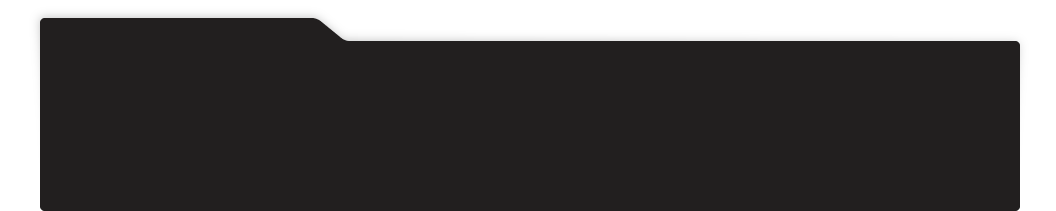
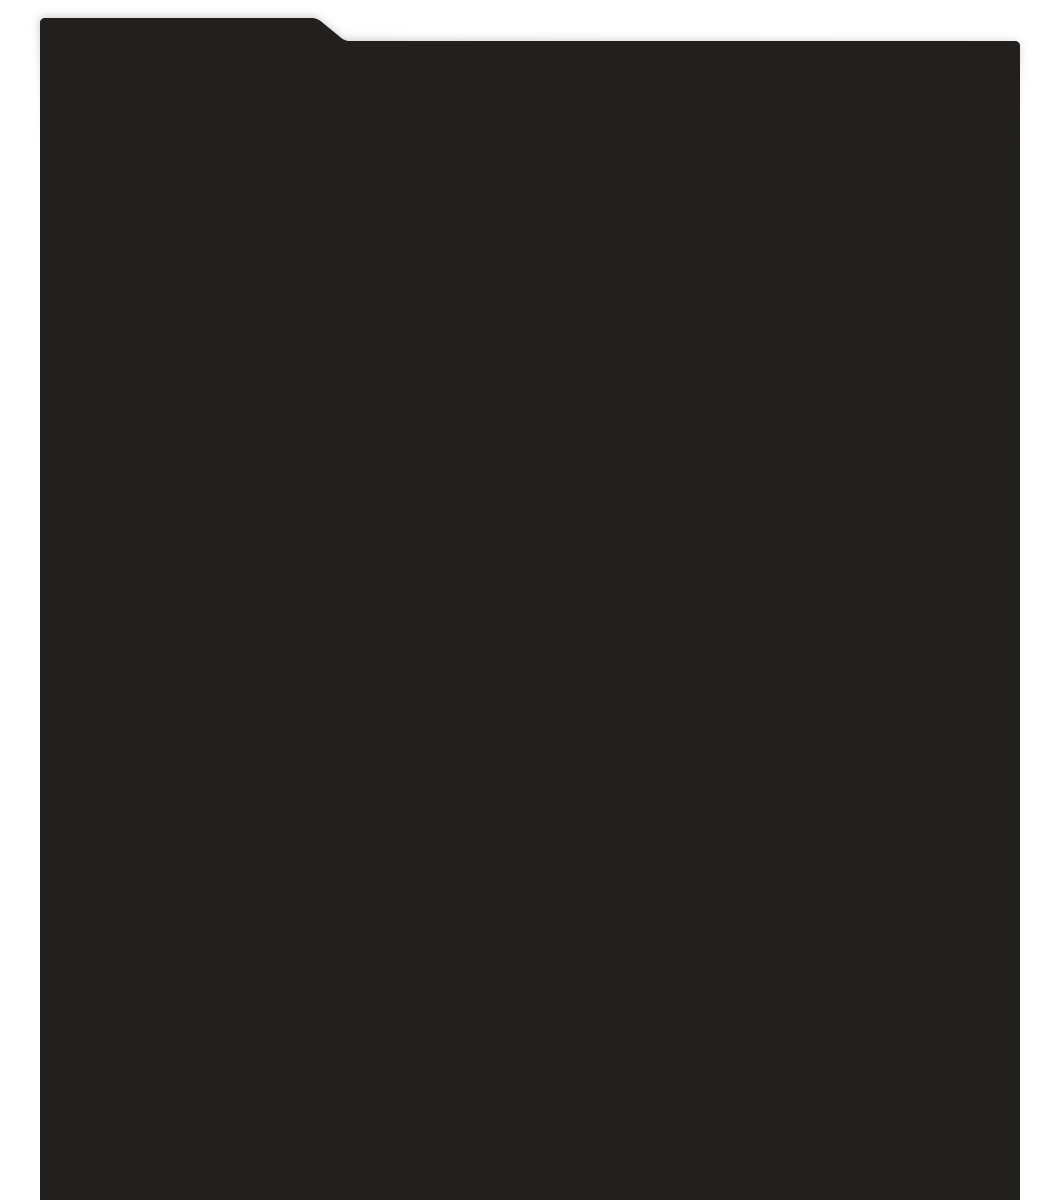
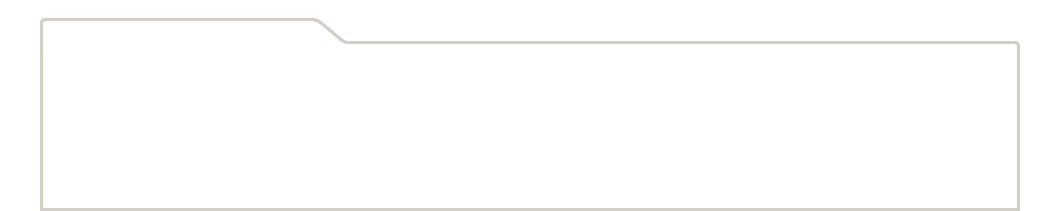
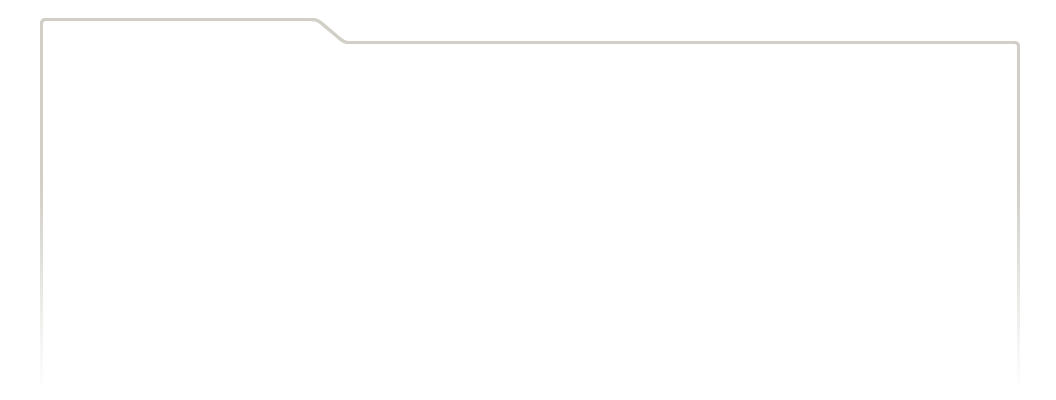
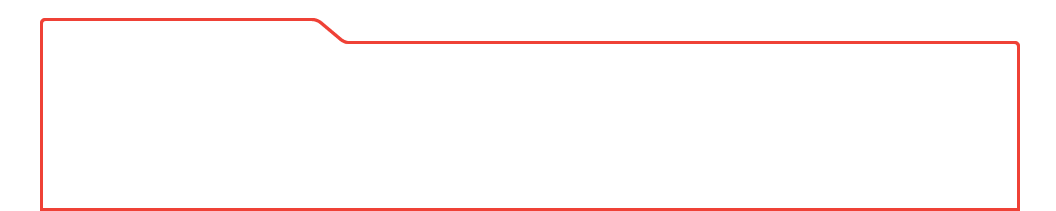
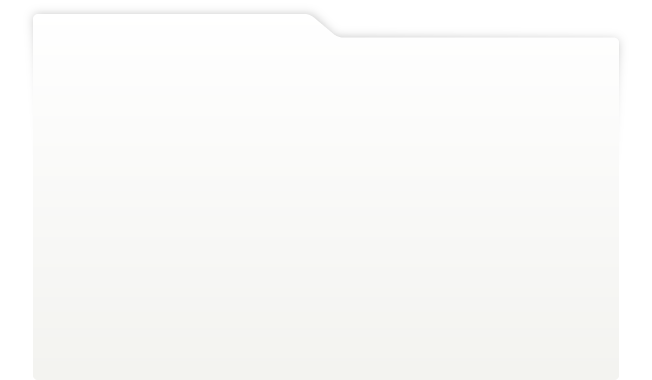
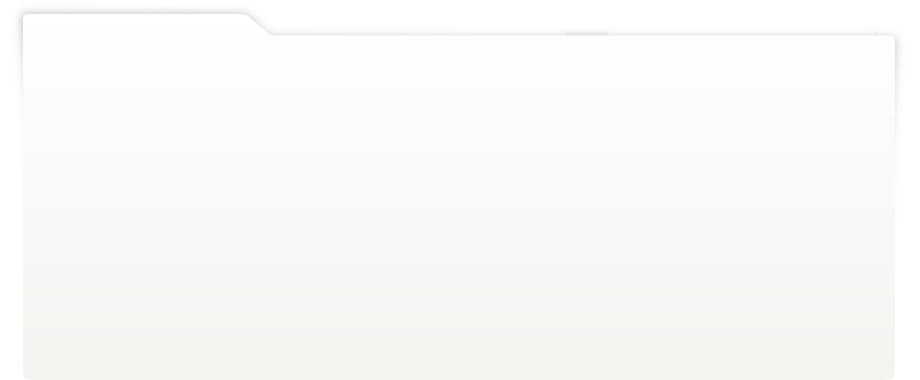
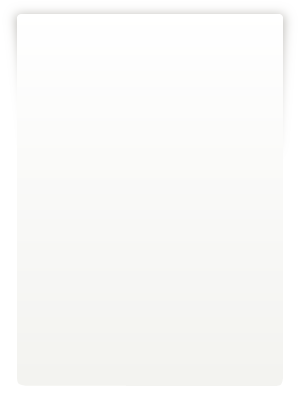
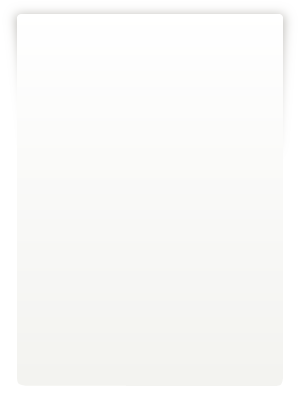
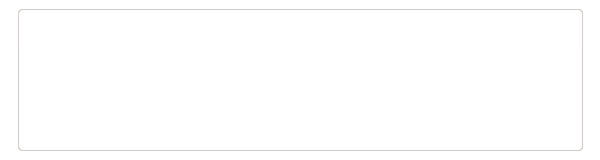
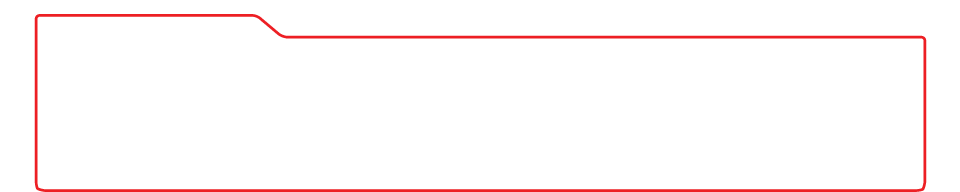
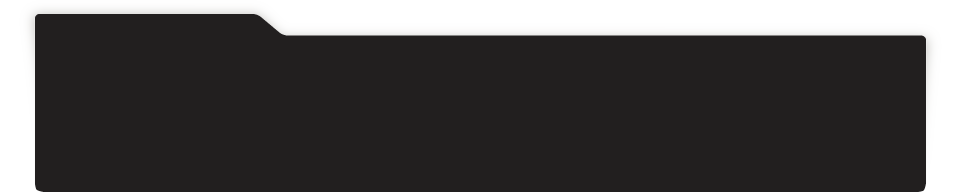
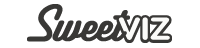
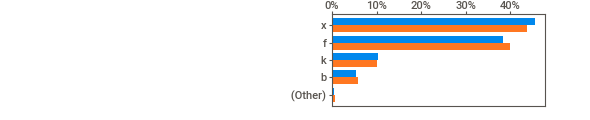
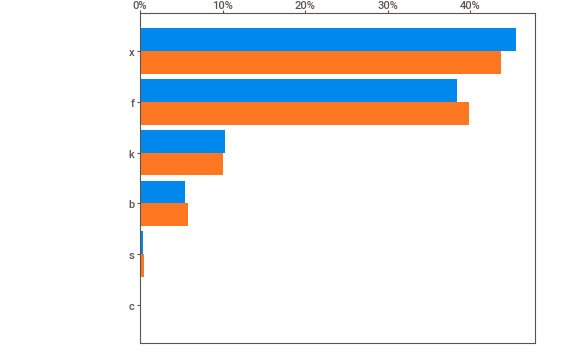
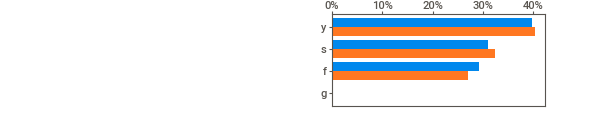
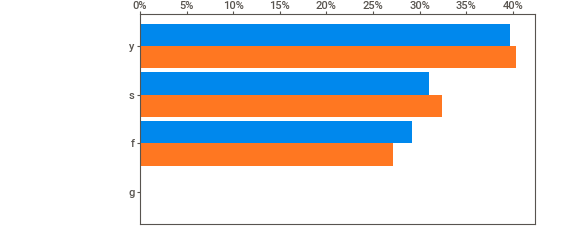
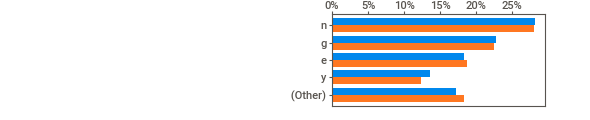
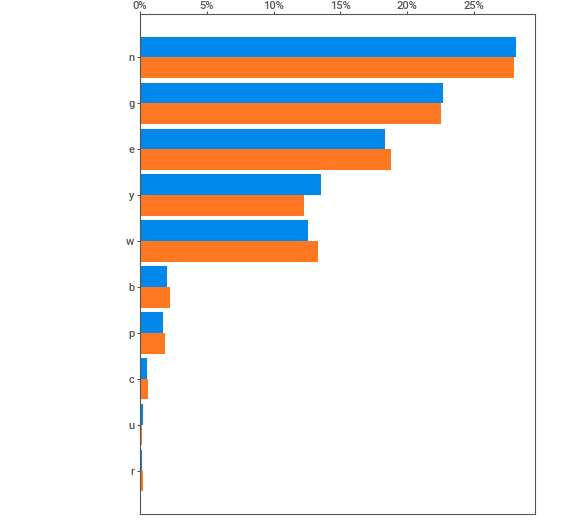
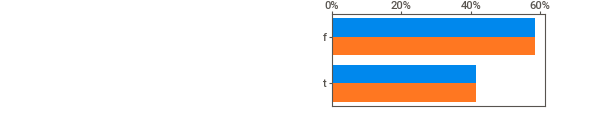
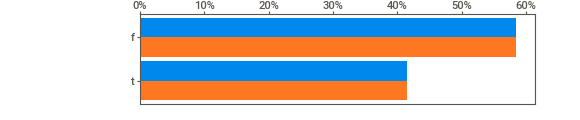
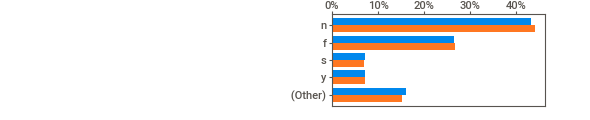
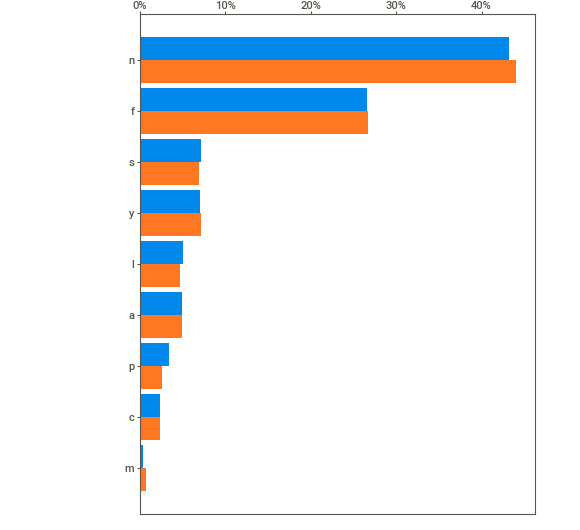
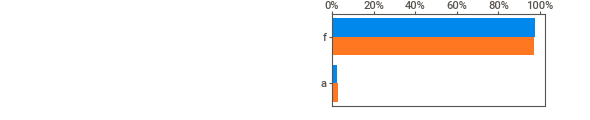
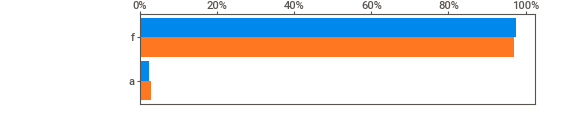
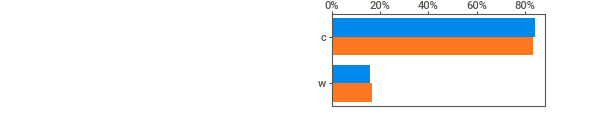
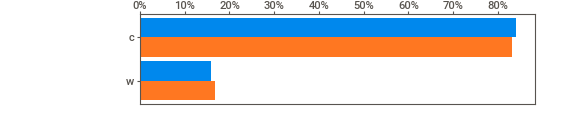
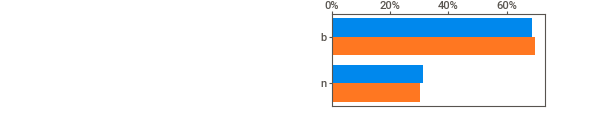
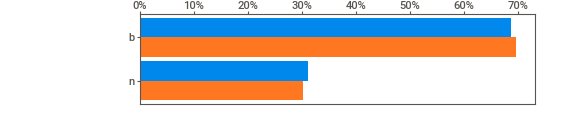
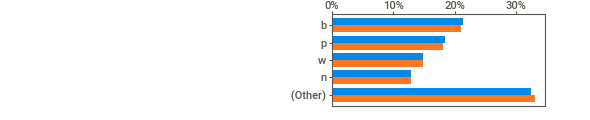
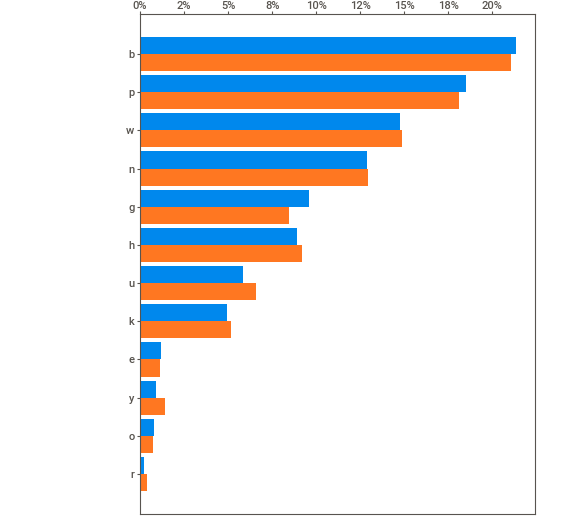
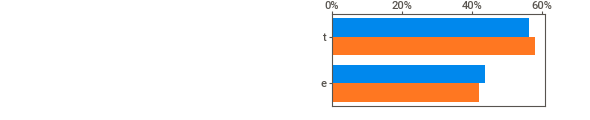
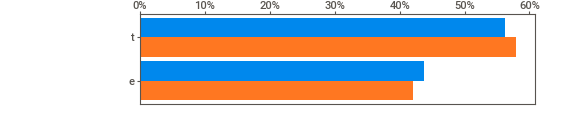
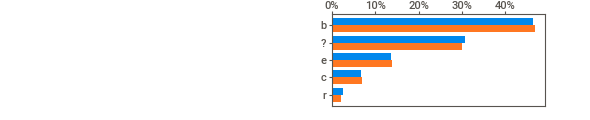
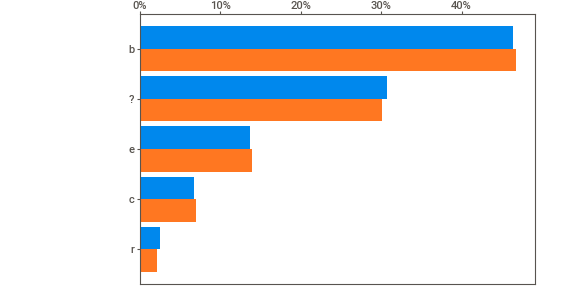
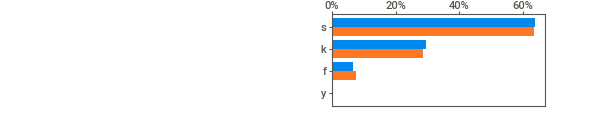
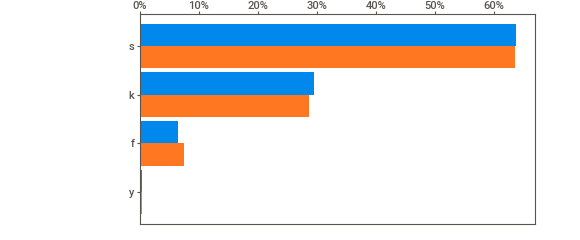
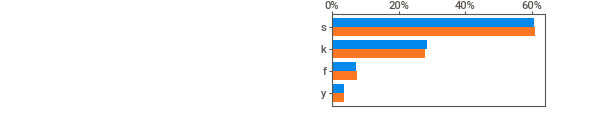
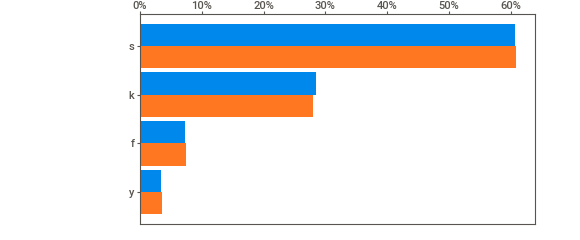
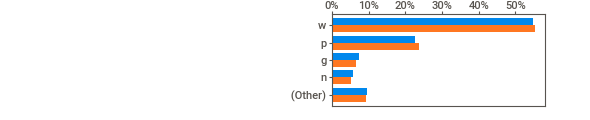
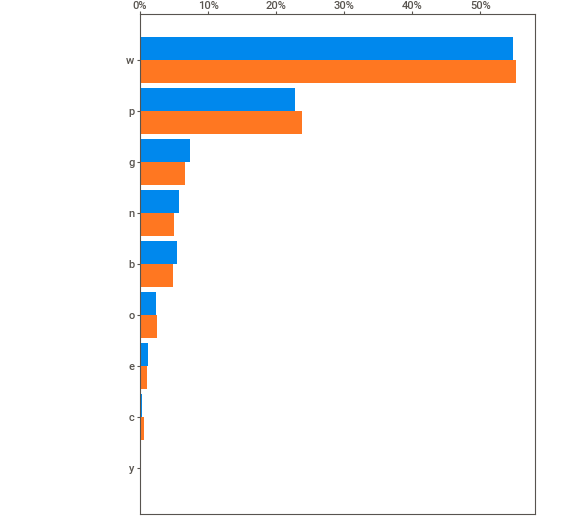
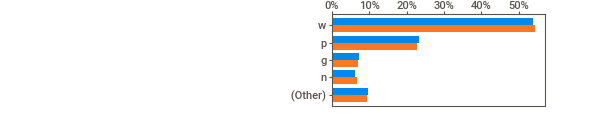
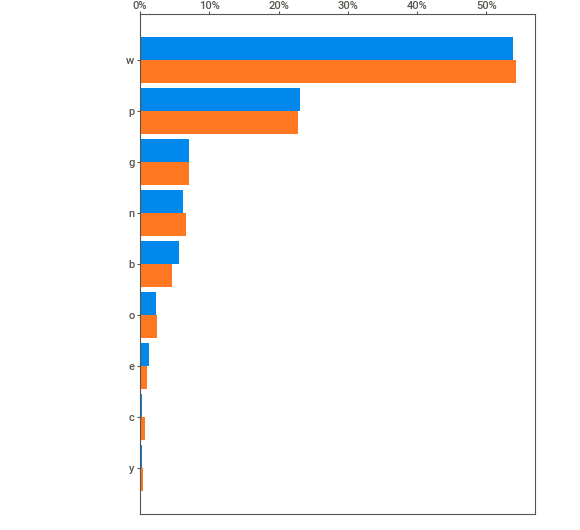
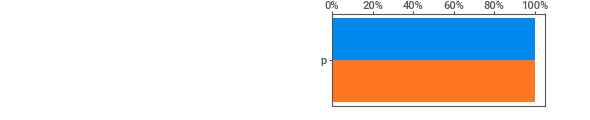
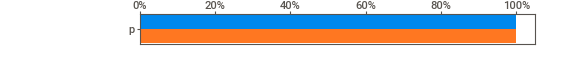
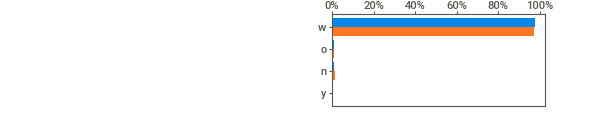
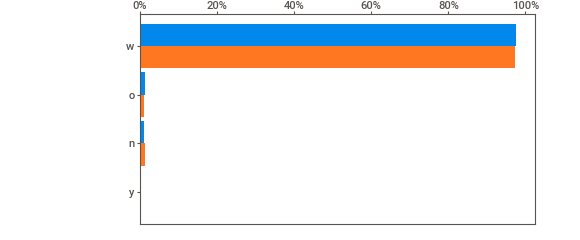
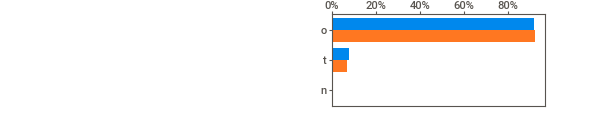
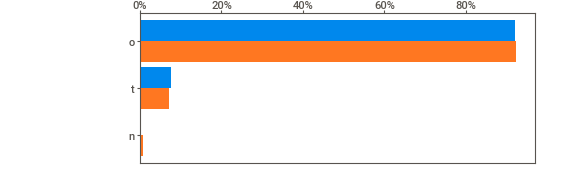
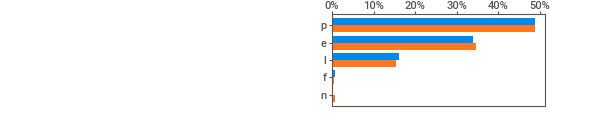
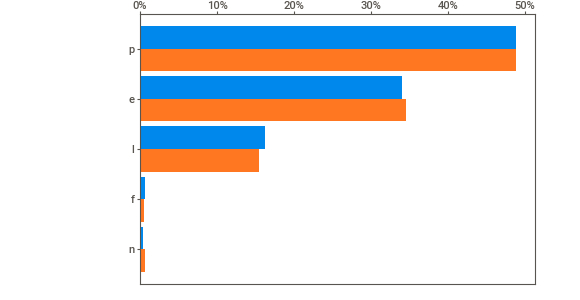
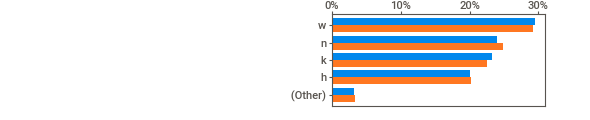
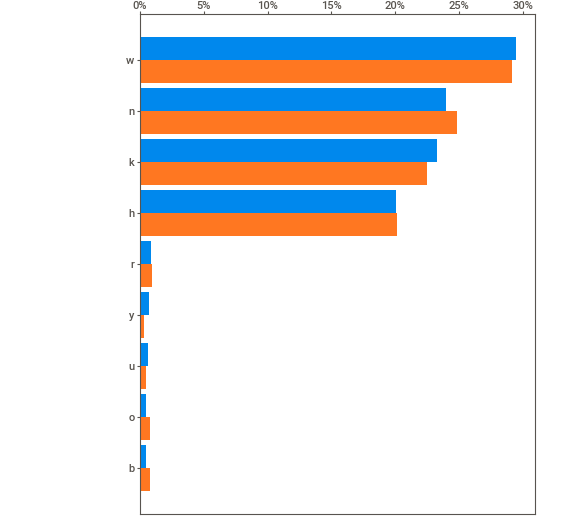
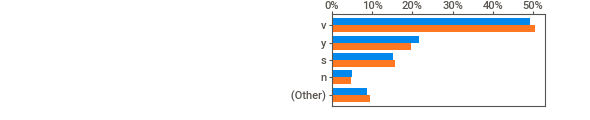
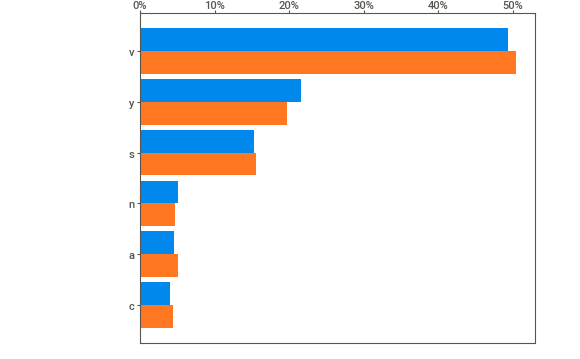
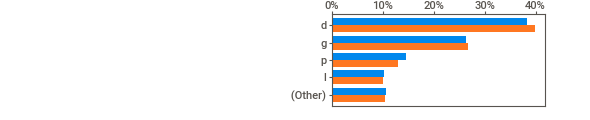
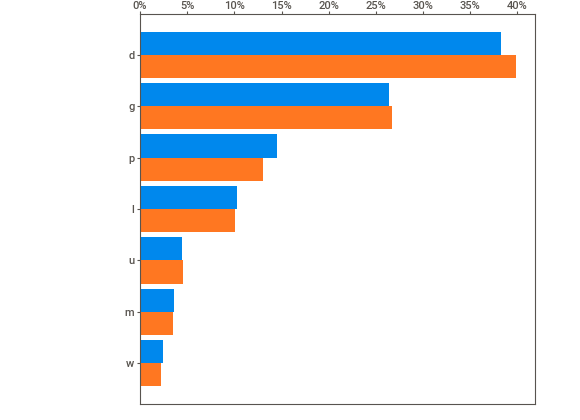
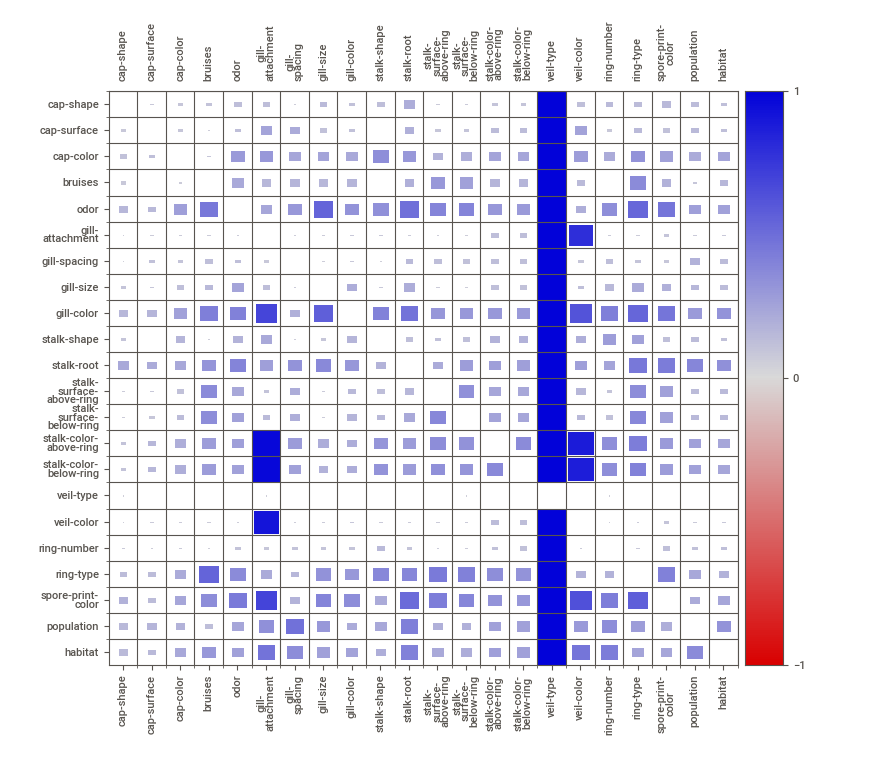
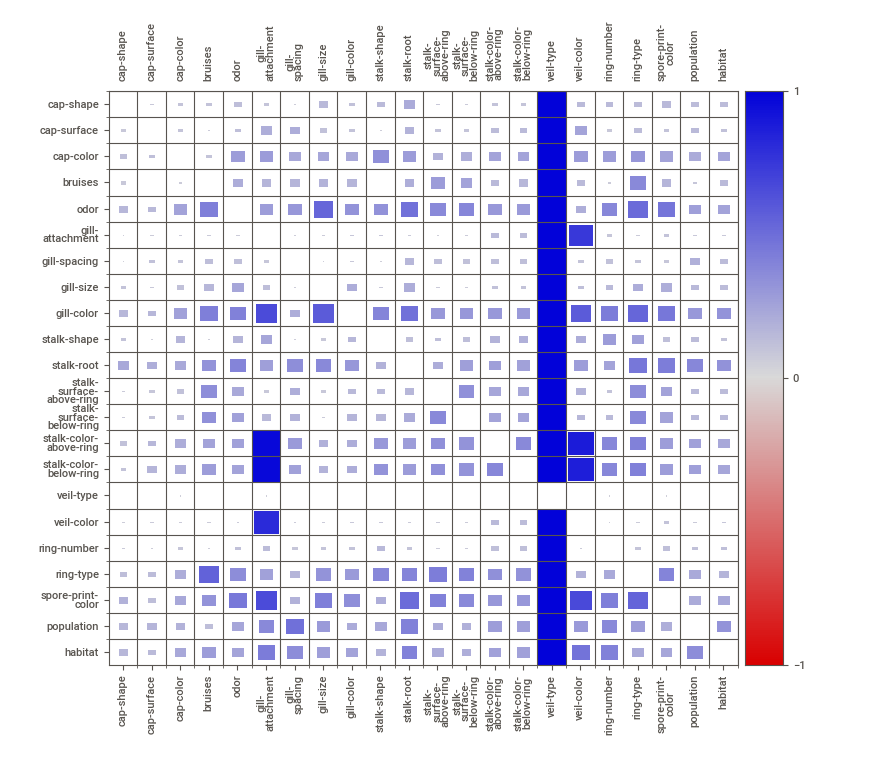

Report CompareReport was generated.


In [10]:
compare_report = sv.compare([X_train, 'Train'], [X_test, 'Test'])
compare_report.show_notebook(layout='vertical')

compare_report.show_html('CompareReport', open_browser=False)